In [1]:
import models
import os
import pandas as pd
from models import get_raw_data, get_rpm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pasta ='database/dados_brutos/normal'

# pasta ='database/dados_brutos/horizontal-misalignment/0.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.0mm'
# pasta ='database/dados_brutos/horizontal-misalignment/1.5mm'
# pasta ='database/dados_brutos/horizontal-misalignment/2.0mm'

# pasta ='database/dados_brutos/imbalance/6g'
# pasta ='database/dados_brutos/imbalance/10g'
# pasta ='database/dados_brutos/imbalance/15g'
# pasta ='database/dados_brutos/imbalance/20g'
# pasta ='database/dados_brutos/imbalance/25g'
# pasta ='database/dados_brutos/imbalance/30g'
# pasta ='database/dados_brutos/imbalance/35g'

# pasta ='database/dados_brutos/overhang/ball_fault/0g'
# pasta ='database/dados_brutos/overhang/ball_fault/6g'
# pasta ='database/dados_brutos/overhang/ball_fault/20g'
# pasta ='database/dados_brutos/overhang/ball_fault/35g'

# pasta ='database/dados_brutos/overhang/cage_fault/0g'
# pasta ='database/dados_brutos/overhang/cage_fault/6g'
# pasta ='database/dados_brutos/overhang/cage_fault/20g'
# pasta ='database/dados_brutos/overhang/cage_fault/35g'

# pasta ='database/dados_brutos/overhang/outer_race/0g'
# pasta ='database/dados_brutos/overhang/outer_race/6g'
# pasta ='database/dados_brutos/overhang/outer_race/20g'
# pasta ='database/dados_brutos/overhang/outer_race/35g'
 
# pasta ='database/dados_brutos/underhang/ball_fault/0g'
# pasta ='database/dados_brutos/underhang/ball_fault/6g'
# pasta ='database/dados_brutos/underhang/ball_fault/20g'
pasta ='database/dados_brutos/underhang/ball_fault/35g'

# pasta ='database/dados_brutos/underhang/cage_fault/0g'
# pasta ='database/dados_brutos/underhang/cage_fault/6g'
# pasta ='database/dados_brutos/underhang/cage_fault/20g'
# pasta ='database/dados_brutos/underhang/cage_fault/35g'

# pasta ='database/dados_brutos/underhang/outer_race/0g'
# pasta ='database/dados_brutos/underhang/outer_race/6g'
# pasta ='database/dados_brutos/underhang/outer_race/20g'
# pasta ='database/dados_brutos/underhang/outer_race/35g'

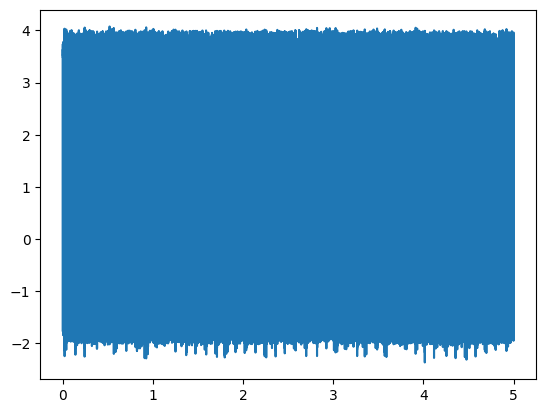

49.57009272355806


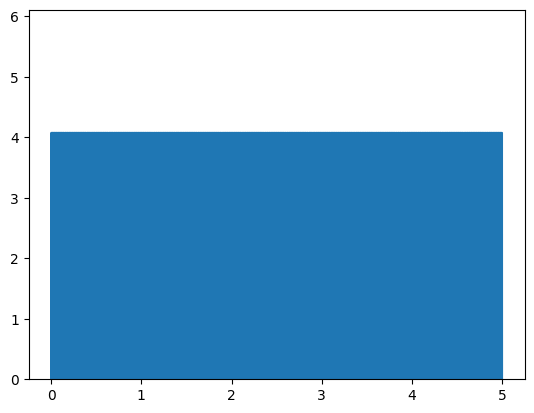

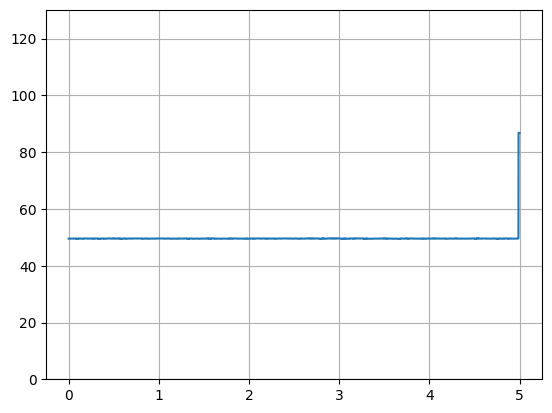

49.57009272355806


In [3]:
arquivos = os.listdir(pasta)
rpms = []
tamanho = 150000

sinal = get_raw_data.GetData(pasta,arquivos[-1],0)

sinal = sinal.Get()
# sinal = pd.json_normalize(sinal)


frequencia_aquisicao = models.freq_aquisicao
n_points = len(sinal)

t_total = n_points/frequencia_aquisicao

vetor_tempo = np.linspace(0,t_total,n_points)

plt.plot(vetor_tempo,sinal)
# plt.axis('off')
plt.show()

rpm = get_rpm.GetRPM(sinal)
rpm_ponto = rpm.get_rpm_ponto_a_ponto('hz')
rpm_medio = rpm.get_rpm_medio('hz')
print(rpm_medio)
rpm.plot_picos()
rpm.plot_rpm('hz')

print(rpm_medio)


13.337599887874124
14.347728328441109
15.098649651121091
15.812766174712724
17.08532668407138
18.17176669012498
18.95783579782319
20.009910934759834
21.095764643837505
21.819551326790343
23.092191111226054
23.682224702775176
24.70368905007877
25.67552410602983
26.607206652259553
27.686136071887034
28.954450063761207
29.824975373169337
30.28533917554596
31.302230745147153
32.30014562062172
33.6154455237918
34.674063800277395
35.81886428419321
36.97657624364905
37.627570432104356
38.5398191923711
39.59879526097443
40.59879526097443
41.59879526097443
42.77336623118068
43.85464427941018
44.74166523863594
45.74166523863594
46.74166523863594
47.74166523863594
48.74166523863594
49.57009272355806


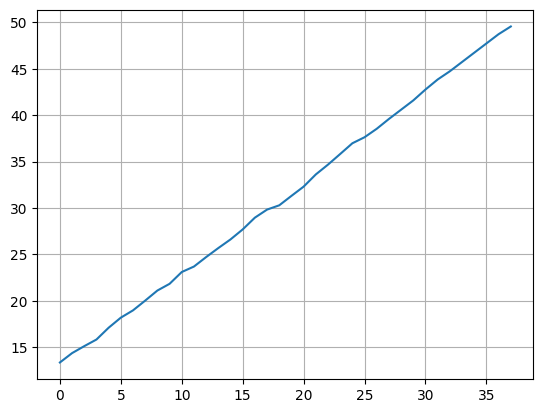

RPM minimo = 13.337599887874124
RPM máximo = 49.57009272355806


In [4]:
arquivos = os.listdir(pasta)

sinal_rpm = get_raw_data.GetData(pasta,arquivos[0],0)
sinal_rpm = sinal_rpm.Get()
rpm = get_rpm.GetRPM(sinal_rpm)
rpm_medio = rpm.get_rpm_medio('hz')

rpms = [rpm_medio]
frequencia_aquisicao = models.freq_aquisicao

for i in range(len(arquivos)):
    sinal_rpm = get_raw_data.GetData(pasta,arquivos[i],0)
    sinal_rpm = sinal_rpm.Get()
    # sinal_rpm = pd.json_normalize(sinal_rpm)


    n_points = len(sinal_rpm)

    t_total = n_points/frequencia_aquisicao

    vetor_tempo = np.linspace(0,t_total,n_points)

    rpm = get_rpm.GetRPM(sinal_rpm)
    rpm_medio = rpm.get_rpm_medio('hz')
    

    if np.abs(rpm_medio) > np.abs(rpms[-1])+3:
        rpm_medio = rpms[-1]+1

    rpms.append(rpm_medio)

    print(rpm_medio)

rpms.pop(0)

plt.plot(range(len(rpms)),rpms)
plt.grid(True)
plt.show()

print(f'RPM minimo = {np.min(rpms)}')
print(f'RPM máximo = {np.max(rpms)}')


In [6]:
import models
from models import get_raw_data, extrair_indicadores,listar_rpms
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time

start = time.time()

rpms = listar_rpms.ListaRPM(pasta).Get()
print(rpms)

end = time.time()

elapsed_time = end - start

elapsed_minutes = elapsed_time / 60

print("Tempo de execução: {:.2f} minutos".format(elapsed_minutes))

[13.337599887874124, 14.347728328441109, 15.098649651121091, 15.812766174712724, 17.08532668407138, 18.17176669012498, 18.95783579782319, 20.009910934759834, 21.095764643837505, 21.819551326790343, 23.092191111226054, 23.682224702775176, 24.70368905007877, 25.67552410602983, 26.607206652259553, 27.686136071887034, 28.954450063761207, 29.824975373169337, 30.28533917554596, 31.302230745147153, 32.30014562062172, 33.6154455237918, 34.674063800277395, 35.81886428419321, 36.97657624364905, 37.627570432104356, 38.5398191923711, 39.59879526097443, 40.59879526097443, 41.59879526097443, 42.77336623118068, 43.85464427941018, 44.74166523863594, 45.74166523863594, 46.74166523863594, 47.74166523863594, 48.74166523863594, 49.57009272355806]
Tempo de execução: 0.33 minutos
